# Analiysis and Visualization of Sentiment Patterns on Social Media to understand public opinion and attitudes:

In [ ]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

# Set visualization style
sns.set(style="whitegrid")

### Loading CSV file and Overviewing it:

In [81]:
twitt=pd.read_csv('twitter_training.csv',header=None)
twitt

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


### Creating column names:

In [82]:
# Rename columns for clarity
twitt.columns = ["ID", "Entity", "Sentiment", "Text"]
twitt.head(10)

,ID,Entity,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [83]:
twitt.isnull().sum()

ID             0
Entity         0
Sentiment      0
Text         686
dtype: int64

### Dropping the missed values for the target column:

In [86]:
# Drop rows with missing 'Text' and "Irrelevant" sentiment
twitt = twitt[~((twitt["Text"].isnull()) & (twitt["Sentiment"] == "Irrelevant"))]
twitt

,ID,Entity,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [87]:
# Drop rows where 'Text' is missing
twitt = twitt.dropna(subset=["Text"])
print(twitt.isnull().sum())  # Confirm no missing values remain

ID           0
Entity       0
Sentiment    0
Text         0
dtype: int64


### Checking for duplicated records and removing it if any:

In [ ]:

# Check for duplicates
print(f"Duplicate rows: {twitt.duplicated().sum()}")



Duplicate rows: 2340


In [90]:
# Remove duplicates
twitt = twitt.drop_duplicates()
# Check for duplicates
print(f"Duplicate rows: {twitt.duplicated().sum()}")

Duplicate rows: 0


#### Balance Sentiment Labels:
If the dataset is imbalanced (e.g., more "Neutral" than "Positive"), balance it by sampling:

In [91]:
# Check sentiment distribution
print(twitt["Sentiment"].value_counts())

Sentiment
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64


###  Preprocess Text Column
Clean the "Text" column for sentiment analysis:

In [92]:
# Preprocess the text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|@\S+|#\S+", "", text)  # Remove URLs, mentions, and hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove non-alphabetical characters
    return text

twitt["Cleaned_Text"] = twitt["Text"].apply(preprocess_text)
twitt["Cleaned_Text"].head(10)


0    im getting on borderlands and i will murder yo...
1    i am coming to the borders and i will kill you...
2    im getting on borderlands and i will kill you all
3    im coming on borderlands and i will murder you...
4    im getting on borderlands  and i will murder y...
5    im getting into borderlands and i can murder y...
6    so i spent a few hours making something for fu...
7    so i spent a couple of hours doing something f...
8    so i spent a few hours doing something for fun...
9    so i spent a few hours making something for fu...
Name: Cleaned_Text, dtype: object

### Encode Sentiment for Modeling
Convert sentiment labels into numerical format for ease of Analysis.

In [53]:
# Map sentiment to numbers
sentiment_mapping = {"Positive": 2, "Neutral": 1, "Negative": 0, "Irrelevant": -1}
twitt["Sentiment_Label"] = twitt["Sentiment"].map(sentiment_mapping)
twitt[["Sentiment", "Sentiment_Label"]].head(10)



,Sentiment,Sentiment_Label
0,Positive,2
1,Positive,2
2,Positive,2
3,Positive,2
4,Positive,2
5,Positive,2
6,Positive,2
7,Positive,2
8,Positive,2
9,Positive,2


### Exploratory Data Analysis (EDA):
Sentiment Distribution

Visualize the distribution of sentiments (Positive, Negative, Neutral, Irrelevant) to understand the class balance.

C:\Users\Admin\AppData\Local\Temp\ipykernel_13996\595085976.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=twitt, x="Sentiment", palette="viridis", order=twitt["Sentiment"].value_counts().index)


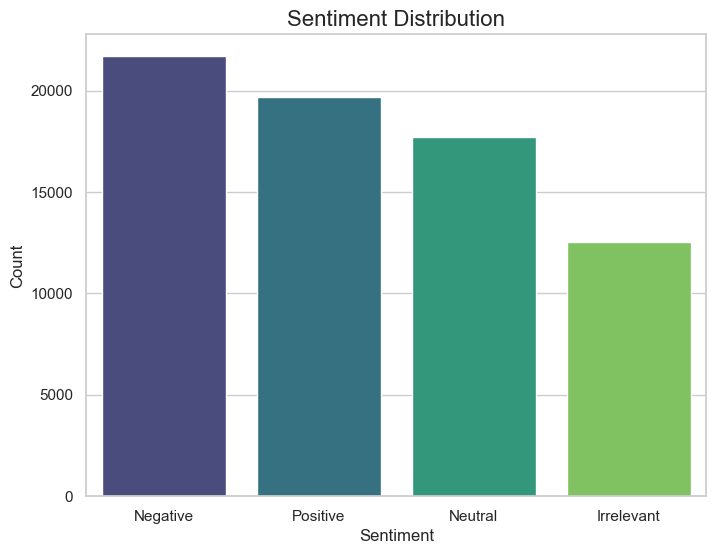

In [93]:
# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=twitt, x="Sentiment", palette="viridis", order=twitt["Sentiment"].value_counts().index)
plt.title("Sentiment Distribution", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

### Word Clouds for Each Sentiment:

Generate word clouds for different sentiments to highlight common words

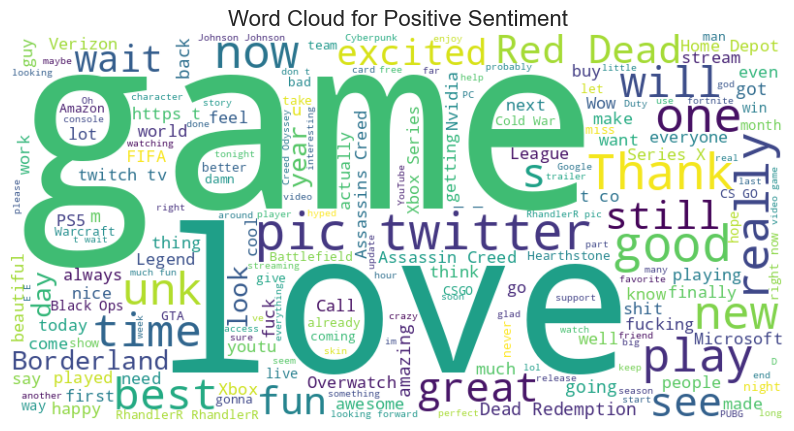

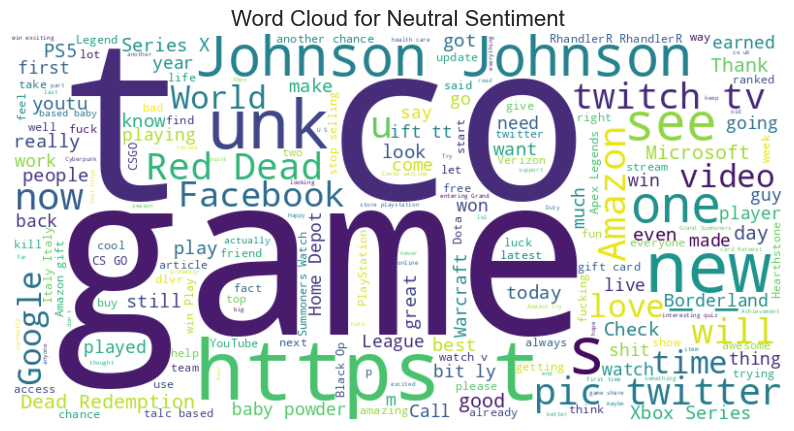

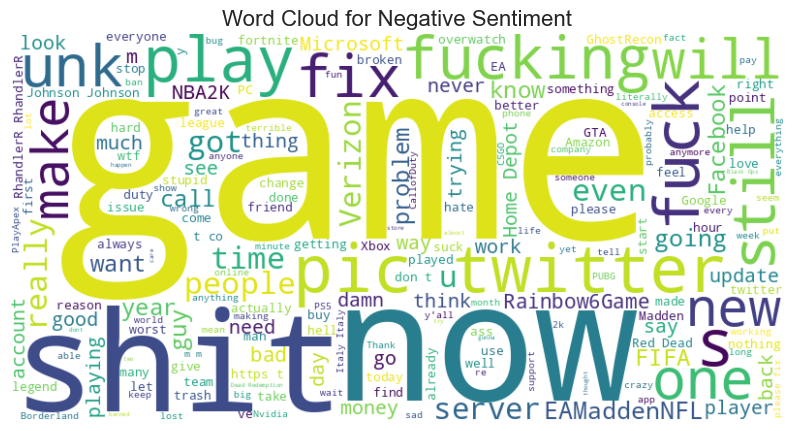

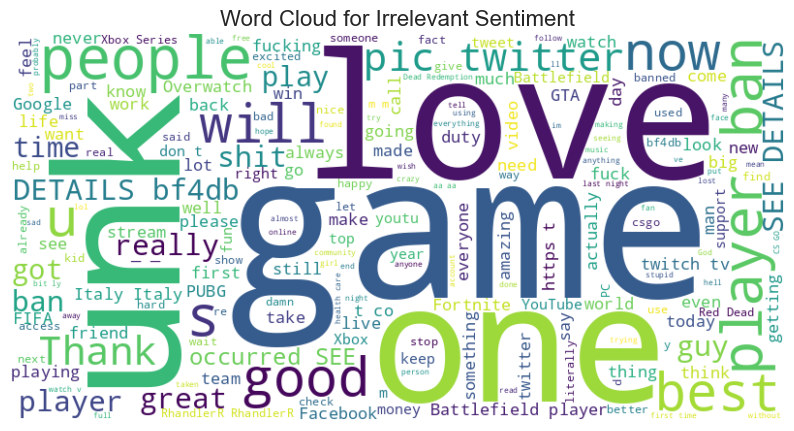

In [94]:
from wordcloud import WordCloud

# Generate word clouds for each sentiment
sentiments = twitt["Sentiment"].unique()
for sentiment in sentiments:
    text = " ".join(twitt[twitt["Sentiment"] == sentiment]["Text"].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment} Sentiment", fontsize=16)
    plt.show()

### Preprocessing for Modeling:
Text Cleaning

Convert text to lowercase, remove stopwords, punctuation, and numbers


In [95]:
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def clean_text(text):
    stop_words = set(stopwords.words("english"))
    text = text.lower()  # Convert to lowercase
    text = "".join([char for char in text if char not in string.punctuation])  # Remove punctuation
    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

twitt["Cleaned_Text"] = twitt["Text"].dropna().apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Feature Extraction

Use TF-IDF Vectorization to convert text data into numerical features.

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(twitt["Cleaned_Text"].dropna()).toarray()
y = twitt["Sentiment"]


### Modeling
Train-Test Split

Split the data into training and testing sets.

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train a Classifier

Use a model like Logistic Regression, Random Forest, or an advanced algorithm like XGBoost.

In [100]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

### Evaluation
Accuracy Score Code:

In [77]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 68.34%


### Confusion Matrix Code:

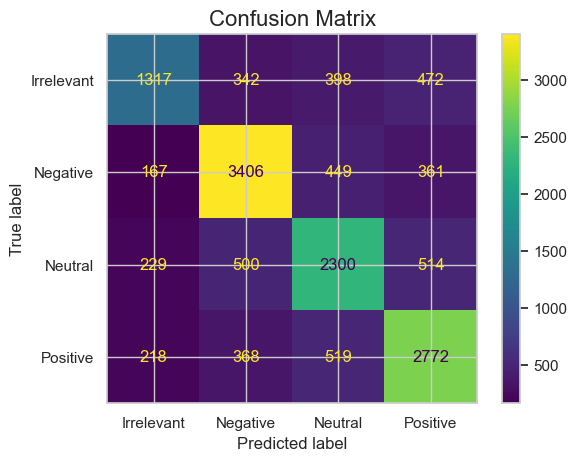

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="viridis", values_format="d")
plt.title("Confusion Matrix", fontsize=16)
plt.show()


### Interpreting the Confusion Matrix:  
In sentiment analysis, the confusion matrix compares the predicted sentiment labels with the actual (true) sentiment labels. This allows us to see how well the model is performing for each class. The rows of the matrix represent the true labels (the actual sentiments), while the columns represent the predicted labels (the sentiments the model predicted).    

The matrix you have provided represents the following:  

**Rows (True Labels):**  

Irrelevant: The actual sentiment is irrelevant.  
Negative: The actual sentiment is negative.  
Neutral: The actual sentiment is neutral.  
Positive: The actual sentiment is positive.


**Columns (Predicted Labels):**    

Irrelevant: The model predicted the sentiment as irrelevant.  
Negative: The model predicted the sentiment as negative.  
Neutral: The model predicted the sentiment as neutral.  
Positive: The model predicted the sentiment as positive.  
Key Points of Interpretation:   

**Diagonal (True Positives):**  

The diagonal elements show the number of correctly predicted labels. In this case:  
Irrelevant: 1317 (true negatives predicted as irrelevant)  
Negative: 3406 (true negatives predicted as negative)  
Neutral: 2300 (true neutrals predicted as neutral)  
Positive: 2772 (true positives predicted as positive)  
Off-Diagonal (False Positives and False Negatives):  

False Positives (FP): These are the predictions where the model predicted a sentiment as positive when it was not, or similar misclassifications for other sentiments.  
False Negatives (FN): These are the predictions where the model missed identifying the true sentiment and made an incorrect prediction.
For example:  

Irrelevant predicted as Negative: 342 instances were incorrectly classified as negative when they should have been irrelevant.  
Negative predicted as Neutral: 449 instances were incorrectly classified as neutral when they should have been negative.  
Neutral predicted as Positive: 514 instances were incorrectly classified as positive when they should have been neutral.  

**Misclassifications:**  

Irrelevant sentiments are frequently misclassified as Negative and Neutral (342, 398).    
Negative sentiments are mostly classified correctly, but 449 instances are misclassified as Neutral and 361 as Positive.    
Neutral sentiments have some misclassifications, with 500 instances misclassified as Negative.    
Positive sentiments are mostly predicted correctly, but a few are misclassified as Negative (368).      


### Classification Report Code:
**Model Performance:**  
Accuracy: We can compute accuracy by dividing the total number of correct predictions (sum of diagonal elements) by the total number of samples. However, because some classes are imbalanced (e.g., more neutral and negative tweets), it might not be enough to rely only on accuracy.  

Accuracy
=
Sum of diagonal elements
Total number of samples  

​
   
Precision, Recall, F1-Score: These metrics are more informative when dealing with imbalanced data:    

**Precision (for each sentiment):** What proportion of the predicted sentiments are correct?  
**Recall (for each sentiment):** What proportion of the actual sentiments were correctly predicted?  
**F1-Score:** The harmonic mean of precision and recall.  

In [99]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

  Irrelevant       0.68      0.52      0.59      2529
    Negative       0.74      0.78      0.76      4383
     Neutral       0.63      0.65      0.64      3543
    Positive       0.67      0.71      0.69      3877

    accuracy                           0.68     14332
   macro avg       0.68      0.67      0.67     14332
weighted avg       0.68      0.68      0.68     14332

